In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

## 数据集
就使用著名的鸢尾花数据。

In [4]:
iris = datasets.load_iris()
data = iris.data # 只包括样本的特征，150x4
y = iris.target # 样本的类型，[0, 1, 2]
features = iris.feature_names  # 4个特征的名称
targets = iris.target_names  # 3类鸢尾花的名称，跟y中的3个数字对应

In [5]:
df = pd.DataFrame(np.c_[data, y.reshape(-1,1)], columns=features + ["label"])
df["target"] = df["label"].map(lambda x: targets[int(x)])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,target
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [6]:
df["target"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: target, dtype: int64

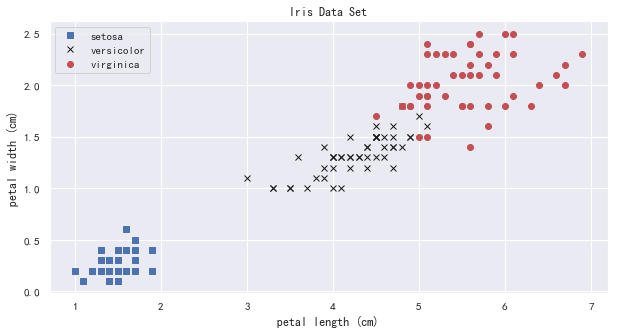

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data[:, 2][y==0], data[:, 3][y==0], 'bs', label=targets[0])
plt.plot(data[:, 2][y==1], data[:, 3][y==1], 'kx', label=targets[1])
plt.plot(data[:, 2][y==2], data[:, 3][y==2], 'ro', label=targets[2])
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set')
plt.legend()

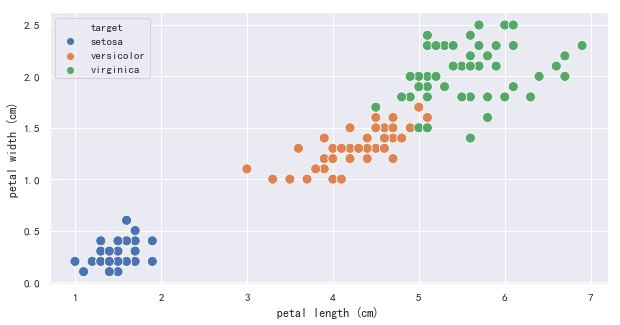

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=df, s=100)

这个数据正好可以测试线性可分支持向量机、线性支持向量机。

## 线性可分支持向量机

硬间隔最大化hard margin maximization

硬间隔支持向量机

In [9]:
# 这里必须加括号
mask = (y == 0) | (y== 1)
X_svm = data[mask][:,(2,3)]
y_svm = y[mask]
X_svm.shape, y_svm.shape

((100, 2), (100,))

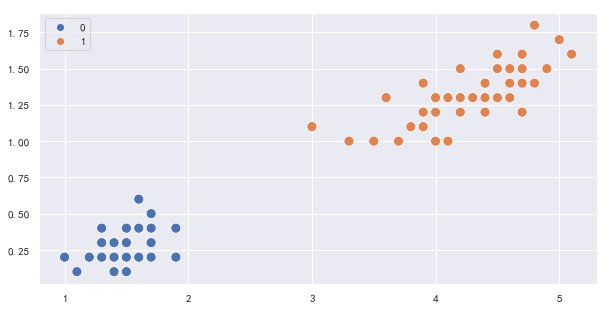

In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100)

In [11]:
clf_svm = SVC(C=1.0, kernel="linear")
clf_svm.fit(X_svm, y_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
clf_svm.coef_, clf_svm.intercept_

(array([[1.1, 0.7]]), array([-3.27999997]))

In [13]:
# 支持向量
clf_svm.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [14]:
w, b = clf_svm.coef_[0], clf_svm.intercept_[0]

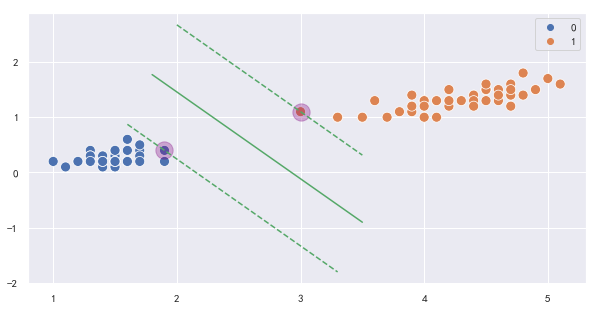

In [15]:
# C值越大越接近硬间隔
clf_svm = SVC(C=10**4, kernel="linear")
clf_svm.fit(X_svm, y_svm)
w, b = clf_svm.coef_[0], clf_svm.intercept_[0]

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100)

x = np.linspace(1.8, 3.5, 100)
plt.plot(x, -(w[0]*x + b)/w[1], "g")

x = np.linspace(1.6, 3.3, 100)
plt.plot(x, -(w[0]*x + (b+1))/w[1], 'g--')
x = np.linspace(2.0, 3.5, 100)
plt.plot(x, -(w[0]*x + (b-1))/w[1], 'g--')

support_vectors_ = clf_svm.support_vectors_
plt.scatter(support_vectors_[:,0],support_vectors_[:,1],color = 'purple',s = 300,alpha = 0.3)

In [16]:
# 就是计算出y值
clf_svm.decision_function(X_svm)

array([-1.81176444, -1.81176444, -1.94117619, -1.6823527 , -1.81176444,
       -1.25882336, -1.72941152, -1.6823527 , -1.81176444, -1.76470563,
       -1.6823527 , -1.55294096, -1.89411737, -2.2823526 , -2.07058793,
       -1.51764685, -1.77647033, -1.72941152, -1.34117629, -1.59999977,
       -1.42352921, -1.51764685, -2.32941142, -1.17647043, -1.16470573,
       -1.55294096, -1.3882351 , -1.6823527 , -1.81176444, -1.55294096,
       -1.55294096, -1.51764685, -1.76470563, -1.81176444, -1.6823527 ,
       -2.07058793, -1.94117619, -1.89411737, -1.94117619, -1.6823527 ,
       -1.85882326, -1.85882326, -1.94117619, -1.22352925, -0.99999987,
       -1.72941152, -1.55294096, -1.81176444, -1.6823527 , -1.81176444,
        3.44705823,  3.27058767,  3.78823464,  2.4588231 ,  3.39999941,
        3.10588181,  3.61176408,  1.30588211,  3.23529356,  2.41176428,
        1.56470559,  2.88235244,  2.21176431,  3.44705823,  1.94117612,
        3.058823  ,  3.27058767,  2.34117606,  3.27058767,  2.16

In [17]:
# 就是计算出y值
np.dot(X_svm, w) + b == clf_svm.decision_function(X_svm)

array([False, False,  True,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False])

In [18]:
# 支持向量的索引
X_svm[clf_svm.support_]

array([[1.9, 0.4],
       [3. , 1.1]])

In [19]:
clf_svm.decision_function(X_svm)[clf_svm.support_]

array([-0.99999987,  0.9999998 ])

## 线性支持向量机
软间隔最大化soft margin maximization

软间隔支持向量机

(-0.5, 2)

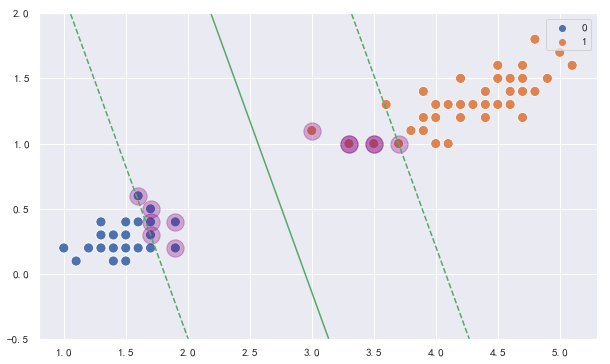

In [20]:
# C值越大越接近硬间隔
clf_svm = SVC(C=0.1, kernel="linear")
clf_svm.fit(X_svm, y_svm)
w, b = clf_svm.coef_[0], clf_svm.intercept_[0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100)

x = np.linspace(1, 5, 100)
plt.plot(x, -(w[0]*x + b)/w[1], "g")

plt.plot(x, -(w[0]*x + (b+1))/w[1], 'g--')
plt.plot(x, -(w[0]*x + (b-1))/w[1], 'g--')

support_vectors_ = clf_svm.support_vectors_
plt.scatter(support_vectors_[:,0],support_vectors_[:,1],color = 'purple',s = 300,alpha = 0.3)

plt.xlim(0.8, 5.3)
plt.ylim(-0.5, 2)

In [21]:
def plot_svm_decision_boundary(X, y, clf_svm, boundary_range, shift, ax, show_support_vectors=True):
    """
    shift:x方向偏移
    """
    w = clf_svm.coef_[0]
    b = clf_svm.intercept_[0]
    b_xmin, b_xmax = boundary_range
        
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(b_xmin, b_xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    decision_boundary_left = -w[0]/w[1] * (x0 - shift) - b/w[1]
    decision_boundary_right = -w[0]/w[1] * (x0 + shift) - b/w[1]

    margin = 1/w[1]  # 沿x1移动的距离
    gutter_up = decision_boundary_right + margin
    gutter_down = decision_boundary_left - margin
    
    # 画数据点和支持向量
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=100, ax=ax)
    if show_support_vectors:
        support_vectors_ = clf_svm.support_vectors_
        ax.scatter(support_vectors_[:,0],support_vectors_[:,1],color = 'purple',s = 300,alpha = 0.3)
    
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0+shift, gutter_up, "g--", linewidth=2)
    plt.plot(x0-shift, gutter_down, "g--", linewidth=2)

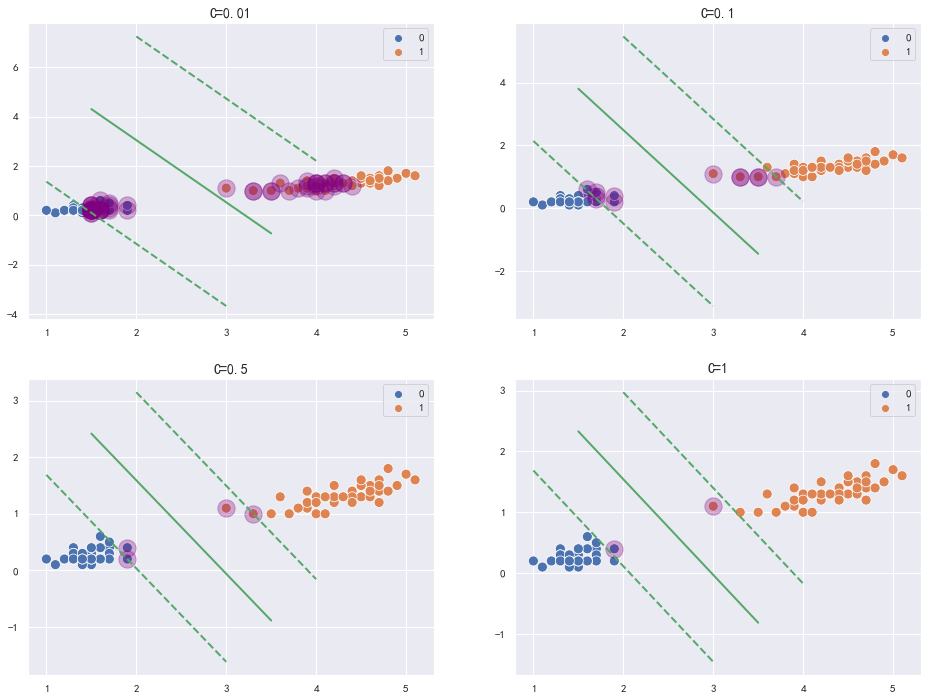

In [22]:
#fig, axs = plt.subplots(2, 2, figsize=(16, 6*2))
plt.figure(figsize=(16, 6*2))
for i,C in enumerate([0.01, 0.1, 0.5, 1]):
    ax = plt.subplot(2, 2, i+1)
    clf_svm_i = SVC(C=C, kernel="linear")
    clf_svm_i.fit(X_svm, y_svm)
    plot_svm_decision_boundary(X_svm, y_svm, clf_svm_i,(1.5, 3.5), 0.5, ax)
    plt.title("C=%s" % C, fontsize=14)

这两类硬间隔是不能划分的。

In [23]:
# 这里必须加括号
mask = (y == 1) | (y== 2)
X_svm = data[mask][:,(2,3)]
y_svm = y[mask]
y_svm = np.where(y_svm==1,0,1)

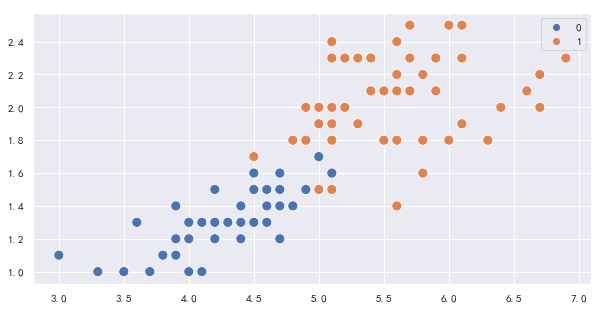

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100)

(0.5, 3)

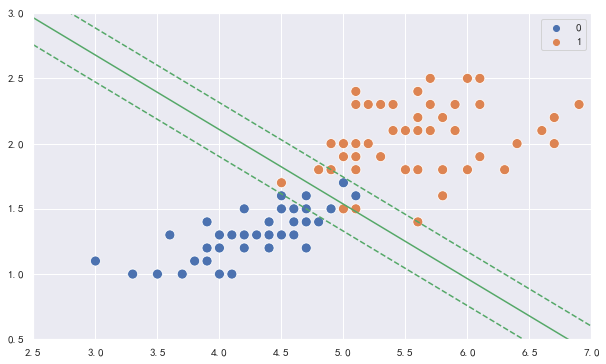

In [25]:
# C值越大越接近硬间隔
clf_svm = SVC(C=1e1, kernel="linear")
clf_svm.fit(X_svm, y_svm)
w, b = clf_svm.coef_[0], clf_svm.intercept_[0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100)

x = np.linspace(2, 7, 100)
plt.plot(x, -(w[0]*x + b)/w[1], "g")

plt.plot(x, -(w[0]*x + (b+1))/w[1], 'g--')
plt.plot(x, -(w[0]*x + (b-1))/w[1], 'g--')

support_vectors_ = clf_svm.support_vectors_
#plt.scatter(support_vectors_[:,0],support_vectors_[:,1],color = 'purple',s = 300,alpha = 0.2)

plt.xlim(2.5, 7)
plt.ylim(0.5, 3)

In [26]:
clf_svm.score(X_svm, y_svm)

0.95

[[0.53369957 0.3141192 ]] -3.182067727256041
[[1.19016375 0.95213016]] -7.4265327953597335
[[2.1829247  2.25365588]] -14.414868277198165
[[2.75873306 4.82861713]] -21.209147373694915
[[3.99819634 7.98631034]] -32.570378999278205
[[3.9982829  7.99442019]] -32.58345299210713
[[3.96049954 7.73003298]] -32.07725875602111
[[ 4.30791672 10.15505314]] -38.768207277014184


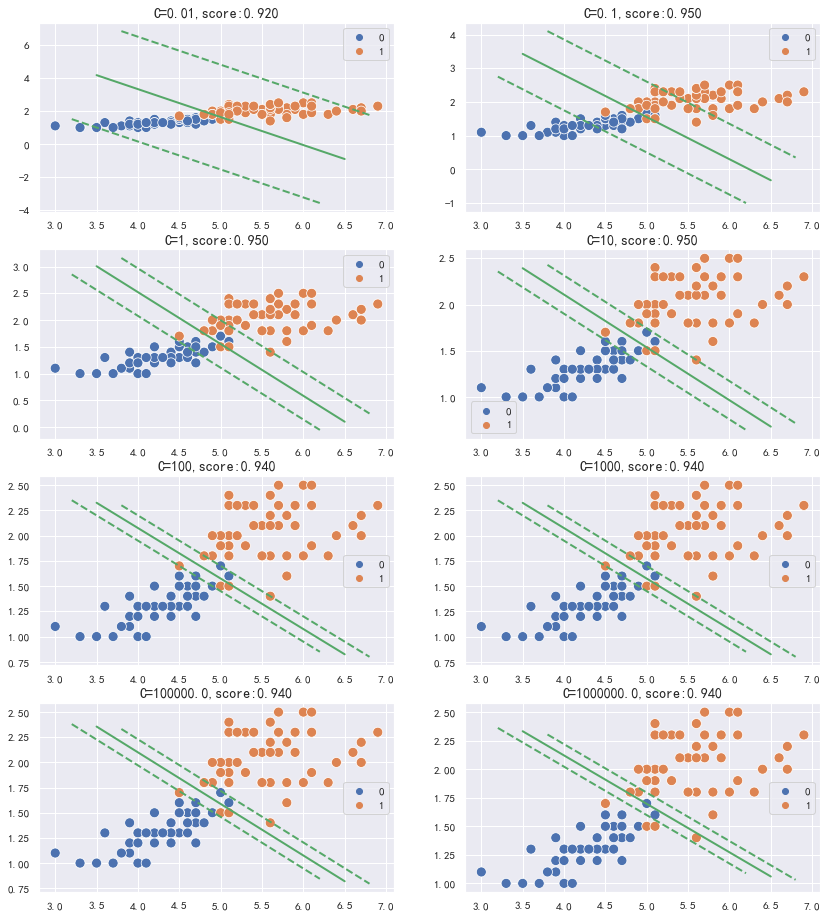

In [27]:
#fig, axs = plt.subplots(2, 2, figsize=(16, 6*2))
rows = 4
plt.figure(figsize=(14, 4*rows))
for i,C in enumerate([0.01, 0.1, 1, 10, 100, 1000, 1e5, 1e6]):
    ax = plt.subplot(rows, 2, i+1)
    clf_svm_i = SVC(C=C, kernel="linear")
    clf_svm_i.fit(X_svm, y_svm)
    plot_svm_decision_boundary(X_svm, y_svm, clf_svm_i,(3.5, 6.5), 0.3, ax, show_support_vectors=False)
    plt.title("C=%s,score:%.3f" % (C, clf_svm_i.score(X_svm, y_svm) ), 
              fontsize=14)
    print(clf_svm_i.coef_, clf_svm_i.intercept_[0])

In [28]:
from matplotlib.colors import ListedColormap

(0.5, 3)

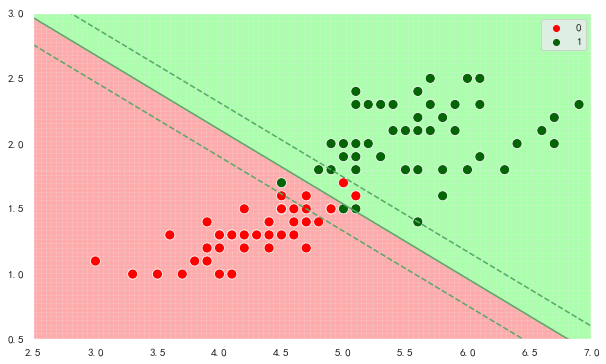

In [29]:
clf_svm = SVC(C=1e1, kernel="linear")
clf_svm.fit(X_svm, y_svm)
w, b = clf_svm.coef_[0], clf_svm.intercept_[0]

plt.figure(figsize=(10, 6))

# 预测所有数据，生成网格数据
xx = np.arange(2, 7, 0.01)
yy = np.arange(0, 3, 0.01)
xx, yy = np.meshgrid(xx, yy)
Z = clf_svm.predict(np.c_[xx.ravel(),yy.ravel()])
zz = Z.reshape(xx.shape)
# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA'])
plt.pcolormesh(xx, yy, zz, cmap=cmap_background, alpha=0.6)

sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100, palette={0:'#FF0000',1:'#056405'})

x = np.linspace(2, 7, 100)
plt.plot(x, -(w[0]*x + b)/w[1], "g")

plt.plot(x, -(w[0]*x + (b+1))/w[1], 'g--')
plt.plot(x, -(w[0]*x + (b-1))/w[1], 'g--')

plt.xlim(2.5, 7)
plt.ylim(0.5, 3)

(0.5, 3)

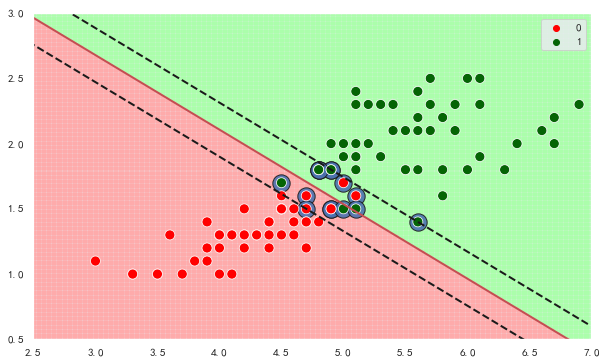

In [30]:
clf_svm = SVC(C=1e1, kernel="linear")
clf_svm.fit(X_svm, y_svm)

plt.figure(figsize=(10, 6))

# 预测所有数据，生成网格数据
xx = np.arange(2, 7, 0.01)
yy = np.arange(0, 3, 0.01)
xx, yy = np.meshgrid(xx, yy)
Z = clf_svm.predict(np.c_[xx.ravel(),yy.ravel()])
zz = Z.reshape(xx.shape)
# 显示背景的颜色
cmap_background = ListedColormap(['#FFAAAA','#AAFFAA'])
plt.pcolormesh(xx, yy, zz, cmap=cmap_background, alpha=0.6)

# 支持向量
support_vectors_ = clf_svm.support_vectors_
plt.scatter(support_vectors_[:,0],support_vectors_[:,1],color = 'b', edgecolors='k',
            s = 300, alpha = 0.9)

sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100, palette={0:'#FF0000',1:'#056405'})

# 不用直线公式，使用所有预测数据的等高线，为后面使用核技巧画=1的线做准备
# 计算的就是wx + b 与距离成正比
Z = clf_svm.decision_function(np.c_[xx.ravel(),yy.ravel()])
zz = Z.reshape(xx.shape)
plt.contour(xx, yy, zz, levels=[-1, 0, 1], colors=list('krk'), linestyles=['--', '-', '--'],
            linewidths=[2, 2, 2])

plt.xlim(2.5, 7)
plt.ylim(0.5, 3)

## 非线性支持向量机
非线性SVM——核技巧

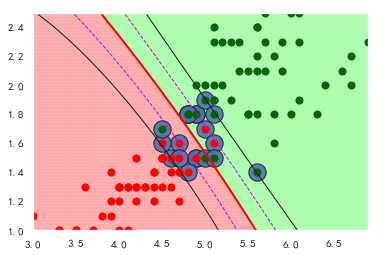

In [31]:
def area_svm_decision_boundary(X, y, clf_svm, show_support_vectors=True, ax=None, axis_shift=(0, 0)):
    """
    """
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    # 预测所有数据，生成网格数据
    xx = np.arange(X[:,0].min()-axis_shift[0], X[:,0].max()+axis_shift[0], 0.01)
    yy = np.arange(X[:,1].min()-axis_shift[1], X[:,1].max()+axis_shift[1], 0.01)
    xx, yy = np.meshgrid(xx, yy)
    Z = clf_svm.predict(np.c_[xx.ravel(),yy.ravel()])
    zz = Z.reshape(xx.shape)
    # 显示背景的颜色
    cmap_background = ListedColormap(['#FFAAAA','#AAFFAA'])
    ax.pcolormesh(xx, yy, zz, cmap=cmap_background, alpha=0.6)

    # 支持向量
    support_vectors_ = clf_svm.support_vectors_
    ax.scatter(support_vectors_[:,0],support_vectors_[:,1],color = 'b', edgecolors='k',
                s = 300, alpha = 0.9)

    # 不用hue，不用label
    #sns.scatterplot(x=X_svm[:,0], y=X_svm[:,1], hue=y_svm, s=100, palette={0:'#FF0000',1:'#056405'}, ax=ax)
    ax.scatter(x=X_svm[y_svm==0][:,0], y=X_svm[y_svm==0][:,1], c='#FF0000', s=50)
    ax.scatter(x=X_svm[y_svm==1][:,0], y=X_svm[y_svm==1][:,1], c='#056405', s=50)
        
    # 不用直线公式，使用所有预测数据的等高线，为后面使用核技巧画=1的线做准备
    # 计算的就是wx + b 与距离成正比
    Z = clf_svm.decision_function(np.c_[xx.ravel(),yy.ravel()])
    zz = Z.reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[-1, -0.5,0,0.5, 1], colors=['k', '#D303F7','red', '#D303F7','k'], 
                linestyles=['-','--', '-','--', '-'],linewidths=[1, 1, 2, 1, 1])

    plt.xlim(X[:,0].min()-axis_shift[0], X[:,0].max()+axis_shift[0])
    plt.ylim(X[:,1].min()-axis_shift[1], X[:,1].max()+axis_shift[1])
    
clf_svm = SVC(C=1e1, kernel="rbf", gamma= 0.1)
clf_svm.fit(X_svm, y_svm)
area_svm_decision_boundary(X_svm, y_svm, clf_svm)

看看高斯的参数C和gamma。

In [32]:
# 笛卡尔积，返回的是迭代器
import itertools
list( itertools.product(range(3), "ab") )

[(0, 'a'), (0, 'b'), (1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]

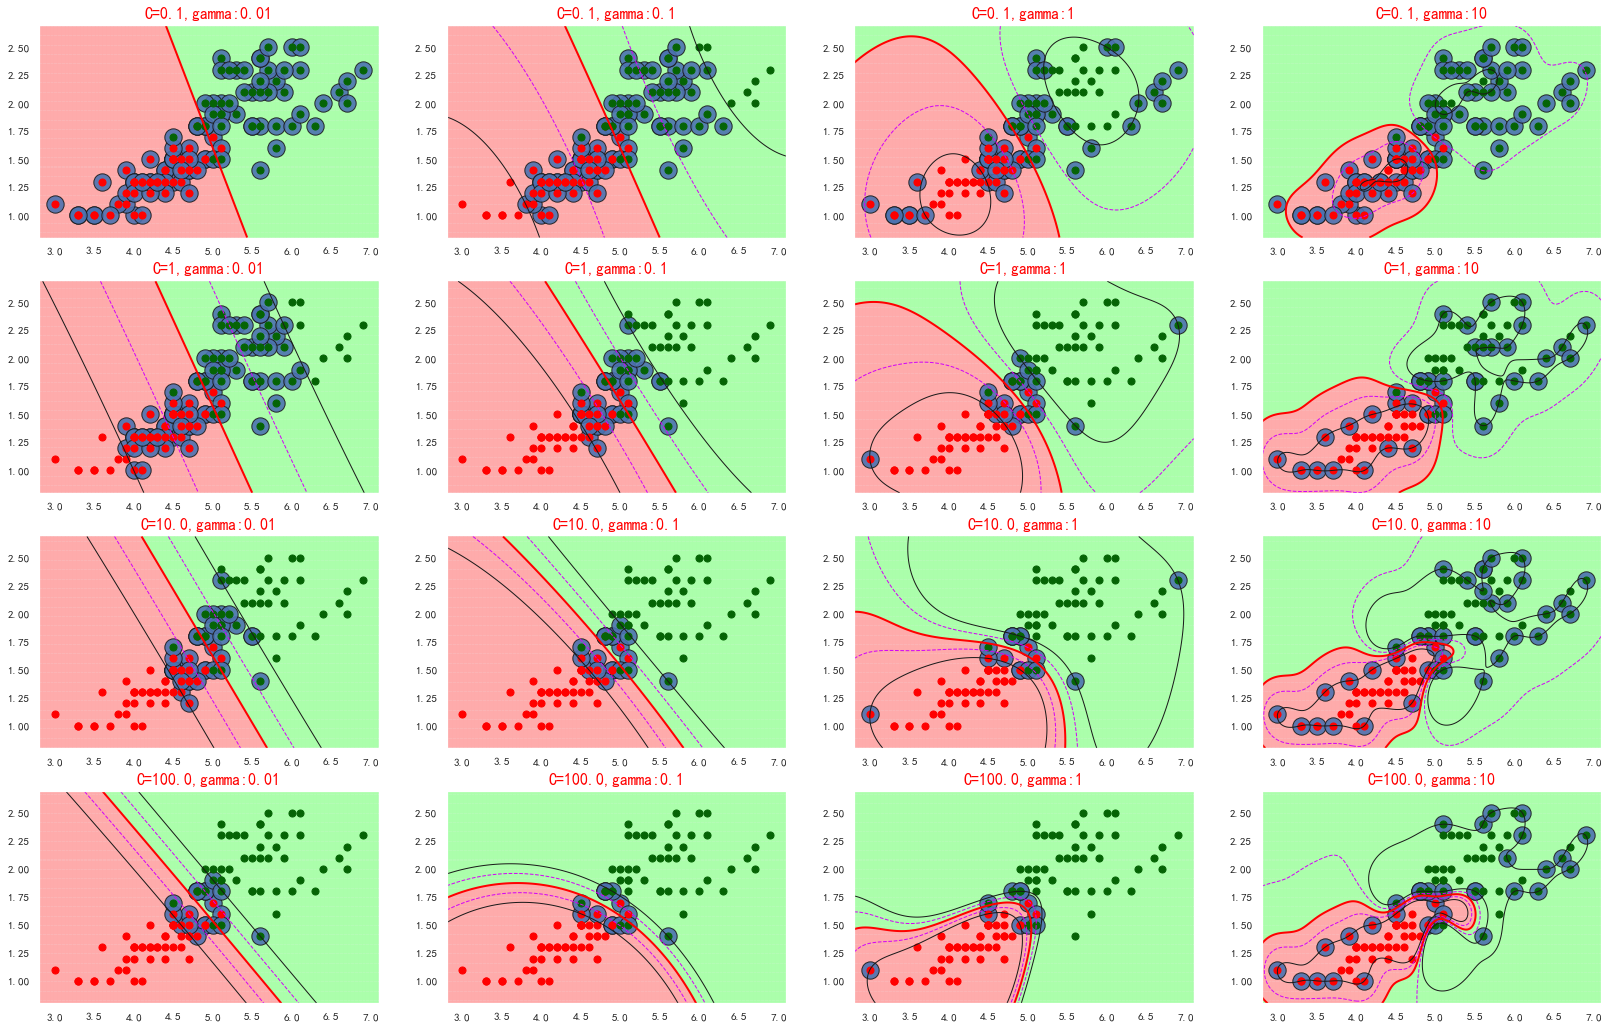

In [33]:
clf_params = itertools.product([0.1, 1, 1e1, 1e2], [0.01, 0.1, 1, 10])
rows = 4
plt.figure(figsize=(28, 4.5*rows))
for i,(C, gamma) in enumerate(clf_params):
    ax = plt.subplot(rows, 4, i+1)
    clf_svm_i = SVC(C=C, kernel="rbf", gamma=gamma)
    clf_svm_i.fit(X_svm, y_svm)
    area_svm_decision_boundary(X_svm, y_svm, clf_svm_i, ax=ax, axis_shift=(0.2,0.2))
    plt.title("C=%s,gamma:%s" % (C, gamma ), 
              fontsize=16, color="red", fontweight=900)

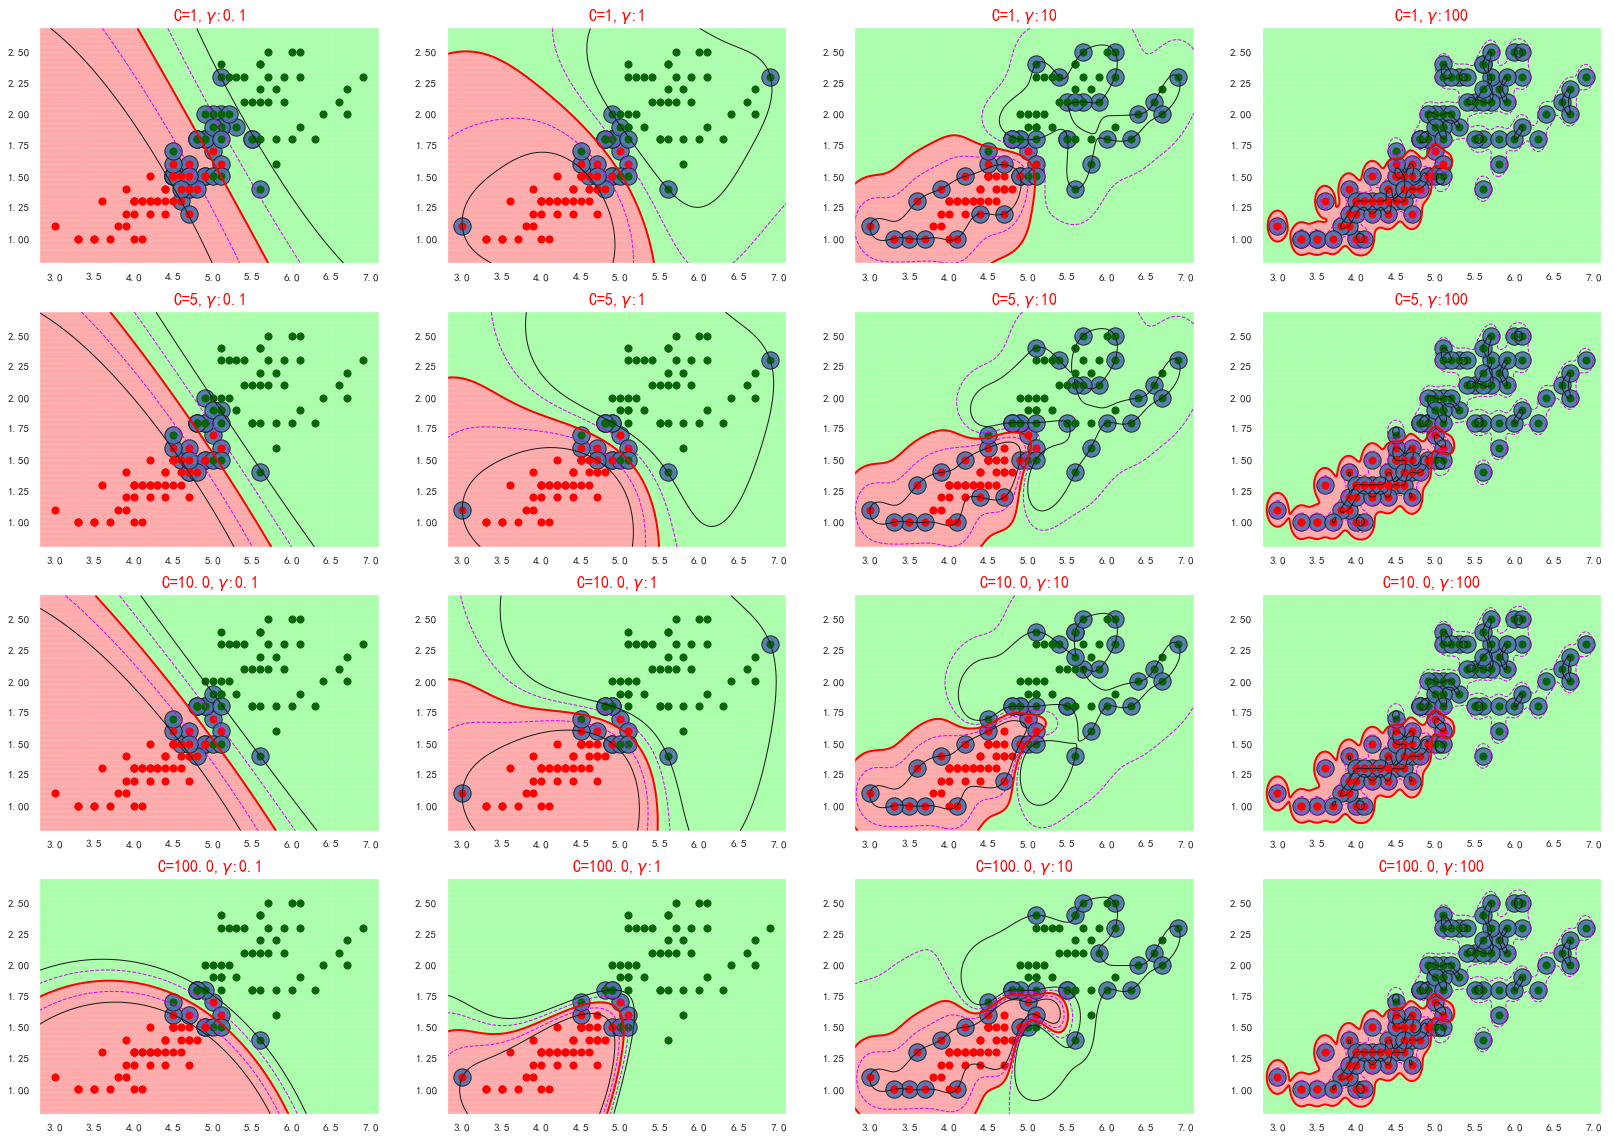

In [34]:
clf_params = itertools.product([1, 5, 1e1, 1e2], [0.1, 1, 10, 100])
rows = 4
plt.figure(figsize=(28, 5*rows))
for i,(C, gamma) in enumerate(clf_params):
    ax = plt.subplot(rows, 4, i+1)
    clf_svm_i = SVC(C=C, kernel="rbf", gamma=gamma)
    clf_svm_i.fit(X_svm, y_svm)
    area_svm_decision_boundary(X_svm, y_svm, clf_svm_i, ax=ax, axis_shift=(0.2,0.2))
    plt.title("C=%s,$\gamma$:%s" % (C, gamma ), 
              fontsize=16, color="red", fontweight=900)

C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。

* gamma越大，σ会越小，高斯图形越窄，模型复杂度越高，容易导致过拟合。  
* gamma越小，σ会越大，高斯图形越宽，模型复杂度越低，容易导致欠拟合。

此外注意RBF公式里面的sigma和gamma的关系如下：
![](assets/20150606105930104.png)

这里面大家需要注意的就是gamma的物理意义，大家提到很多的RBF的幅宽，它会**影响每个支持向量对应的高斯的作用范围**，从而影响泛化性能。我的理解：**如果gamma设的太大，σ会很小，σ很小的高斯分布长得又高又瘦**， 会造成只会作用于支持向量样本附近，**对于未知样本分类效果很差**，存在训练准确率可以很高，(**如果让σ无穷小，则理论上，高斯核的SVM可以拟合任何非线性数据，但容易过拟合**)而测试准确率不高的可能，就是通常说的过训练；而如果如果gamma设的太的过小，σ会很大，则会造成平滑效应太大，无法在训练集上得到特别高的准确率，也会影响测试集的准确率。